In [17]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import importlib


# Get the absolute path of the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
# Define data directory
brighten_dir = os.path.join(project_root, 'BRIGHTEN_data')

# Add project root to sys.path
sys.path.append(project_root)

# Import and reload custom scripts
from scripts import preprocessing as pre
from scripts import visualization as vis
from scripts import feature_selection as fs
from scripts import clustering as cl
from scripts import modeling as mod
from scripts import svm
importlib.reload(pre)
importlib.reload(vis)
importlib.reload(fs)
importlib.reload(cl)
importlib.reload(mod)
importlib.reload(svm)

################ DEFINE column variables from data ###################
from scripts.variables import id_columns, daily_cols_v1, daily_v2_common

from scripts.variables import phq2_cols, phq9_cols, weekly_cols, passive_cols, survey_cols


## Load in dfs scaled
df_names = ['v1_day', 'v2_day', 'v1_week', 'v2_week']

dfs_pca = {}
for name in df_names:
    dfs_pca[name] = pd.read_csv(os.path.join(brighten_dir, f'{name}_pca.csv'))

dfs_scaled = {}
for name in df_names:
    dfs_scaled[name] = pd.read_csv(os.path.join(brighten_dir,f'{name}_scaled.csv'))

dfs_mtmkl = {}
for name in df_names:
    dfs_mtmkl[name] = pd.read_csv(os.path.join(brighten_dir, name, f'{name}_mis4.csv'))

dfs_imp = {}
for name in df_names:
    dfs_imp[name] = pd.read_csv(os.path.join(brighten_dir, name, f'{name}_imp1.csv'))

df_alldays_int70 = pd.read_csv(os.path.join(brighten_dir, 'df_alldays_int70.csv'))
df_alldays_int70['dt'] = pd.to_datetime(df_alldays_int70['dt'], errors='coerce')
week_df_int70 = pd.read_csv(os.path.join(brighten_dir, 'week_df_int70.csv'))



/var/folders/fl/b24z_8kn4490x_bl0njv6fg00000gn/T/ipykernel_81667/2279980705.py:55: DtypeWarning: Columns (14,23,48,106,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df_alldays_int70 = pd.read_csv(os.path.join(brighten_dir, 'df_alldays_int70.csv'))
/var/folders/fl/b24z_8kn4490x_bl0njv6fg00000gn/T/ipykernel_81667/2279980705.py:57: DtypeWarning: Columns (24,107,108,109) have mixed types. Specify dtype option on import or set low_memory=False.
  week_df_int70 = pd.read_csv(os.path.join(brighten_dir, 'week_df_int70.csv'))


Feature Matrix (X): A NumPy array of shape (n_samples, n_features), where:

    n_samples = number of data points.

    n_features = number of attributes per sample.

Label Vector (y): A NumPy array of shape (n_samples,), where:

    Each label is either +1 or -1 (for binary classification).

In [11]:
import numpy as np

# Generate two clusters
np.random.seed(42)
X_class1 = np.random.randn(50, 2) + np.array([2, 2])  # Cluster centered at (2,2)
X_class2 = np.random.randn(50, 2) + np.array([-2, -2])  # Cluster at (-2,-2)

val_class1 = np.random.randn(50, 2) + np.array([2, 2])  # Validation cluster centered at (2,2)
val_class2 = np.random.randn(50, 2) + np.array([-2, -2])  # Validation cluster at (-2,-2)

# Combine data
X = np.vstack((X_class1, X_class2))
y = np.hstack((-1 * np.ones(50), np.ones(50)))  # Labels: -1 for class1, +1 for class2

# Combine validation data
val_X = np.vstack((val_class1, val_class2))
val_y = np.hstack((-1 * np.ones(50), np.ones(50)))  # Validation labels


def linear_kernel(x1, x2):
    return np.dot(x1, x2)
def rbf_kernel(x1, x2, gamma=0.5):
    return np.exp(-gamma * np.linalg.norm(x1 - x2) ** 2)

# Initialize SVM Trainer with a linear kernel and regularization parameter C
svm_trainer = svm.SVMTrainer(kernel=linear_kernel, c=1.0)

# Train the model
svm_model = svm_trainer.train(X, y)

# Predict class for a new sample
prediction = svm_model.predict(val_X[0])  # Predicting the class for the first sample of validation data
print("Predicted class:", prediction)  # Should output either -1 or +1

# Predict on the entire training set
predictions = np.array([svm_model.predict(x_i) for x_i in val_X])
print("Predictions for validation set:", predictions)  # Outputs the predicted classes for all validation samples

# Compute accuracy
accuracy = np.mean(predictions == val_y)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


     pcost       dcost       gap    pres   dres
 0: -1.0187e+01 -1.6253e+02  8e+02  2e+00  5e-15
 1: -5.6078e+00 -7.5571e+01  1e+02  2e-01  4e-15
 2: -1.5451e+00 -1.3171e+01  2e+01  4e-02  5e-15
 3: -1.7719e-02 -1.0442e+00  1e+00  7e-16  3e-15
 4: -2.5682e-01 -5.4882e-01  3e-01  2e-16  1e-15
 5: -3.7776e-01 -5.4359e-01  2e-01  2e-16  8e-16
 6: -4.4980e-01 -4.6063e-01  1e-02  2e-16  8e-16
 7: -4.5454e-01 -4.5480e-01  3e-04  2e-16  8e-16
 8: -4.5464e-01 -4.5465e-01  3e-06  2e-16  1e-15
 9: -4.5464e-01 -4.5464e-01  3e-08  3e-16  1e-15
Optimal solution found.
Predicted class: -1.0
Predictions for validation set: [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1

(10029, 26)


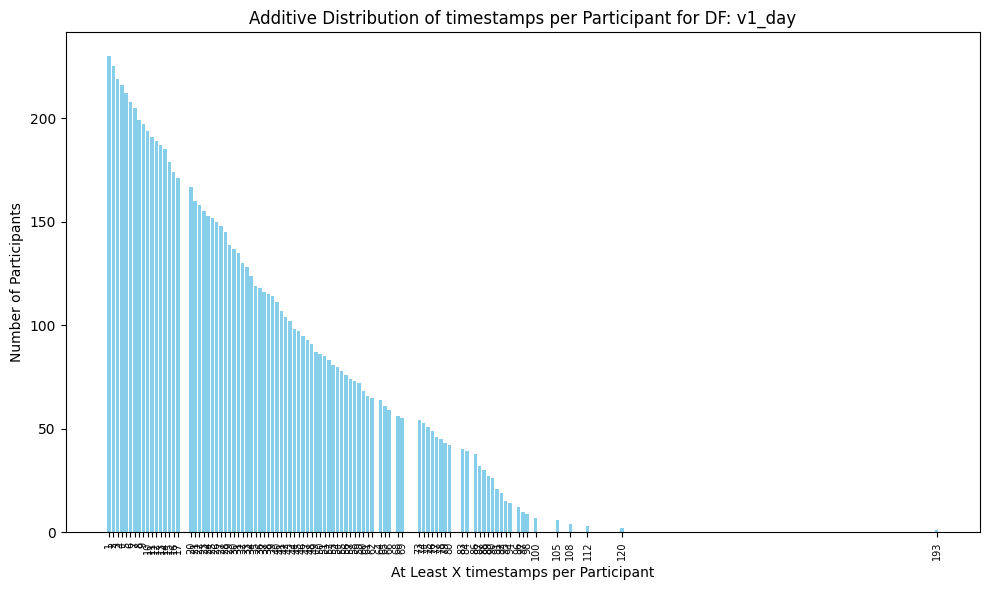

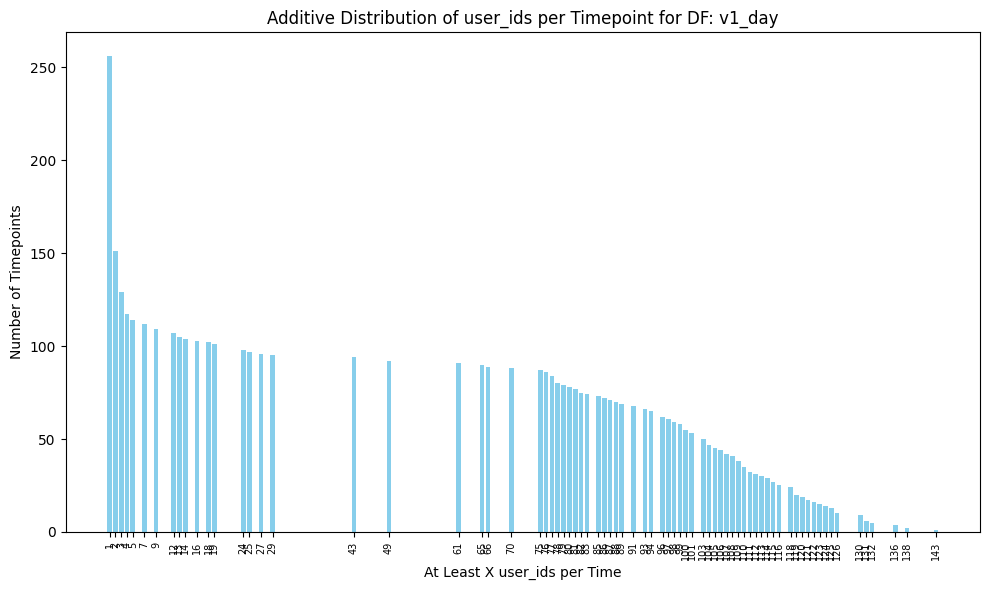

(3718, 23)


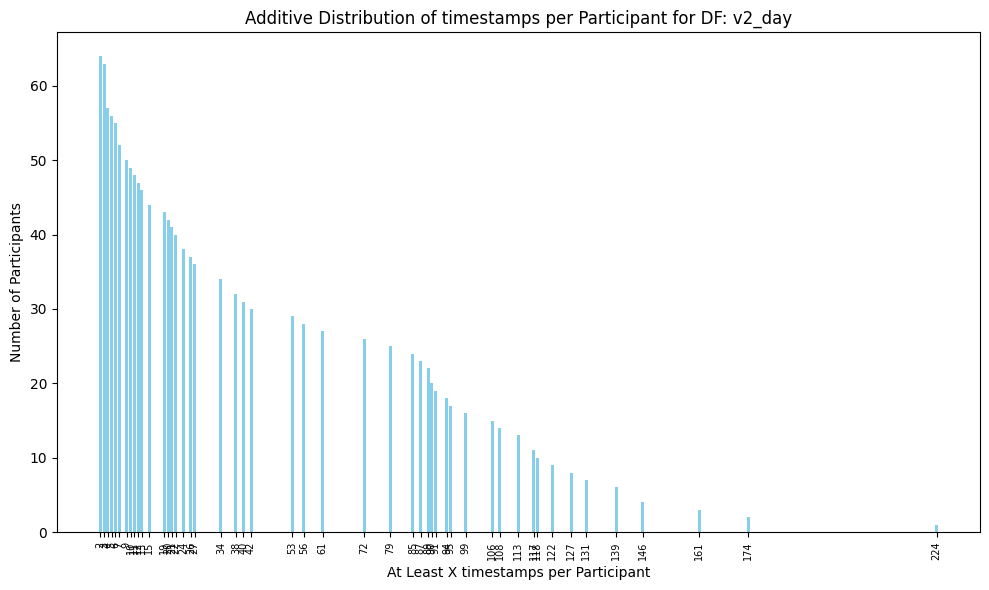

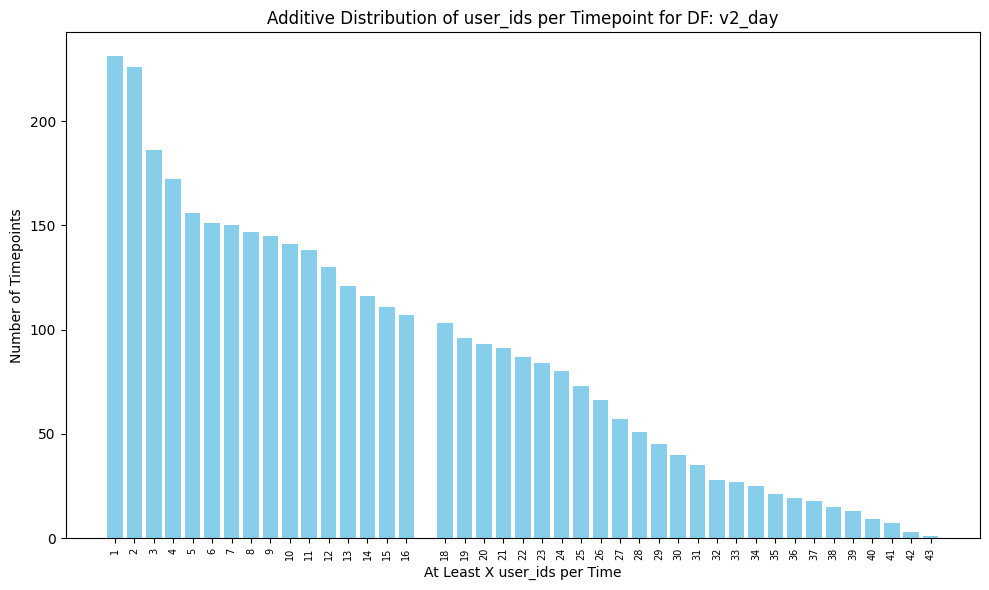

(1767, 25)


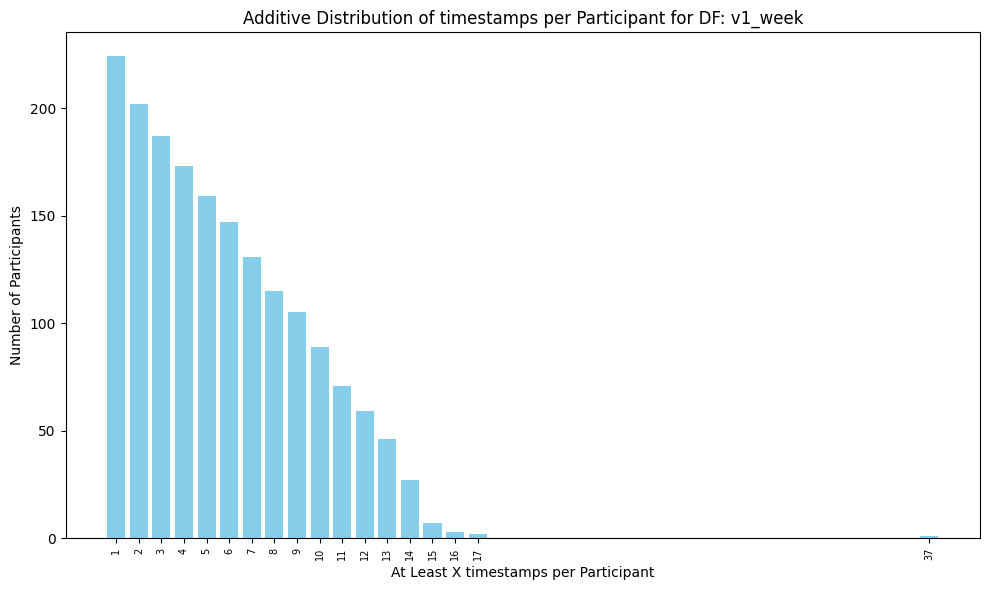

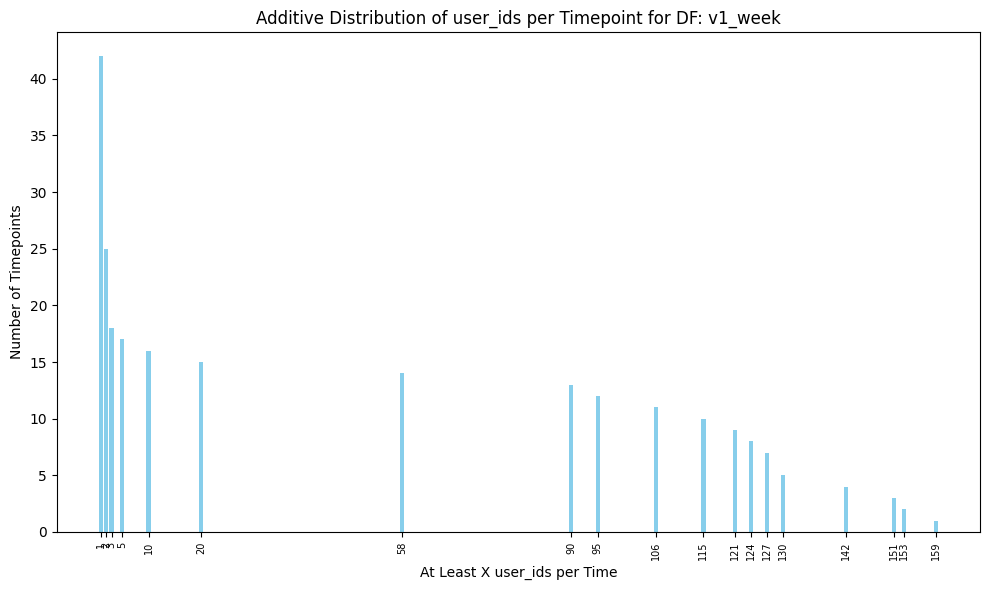

(6341, 16)


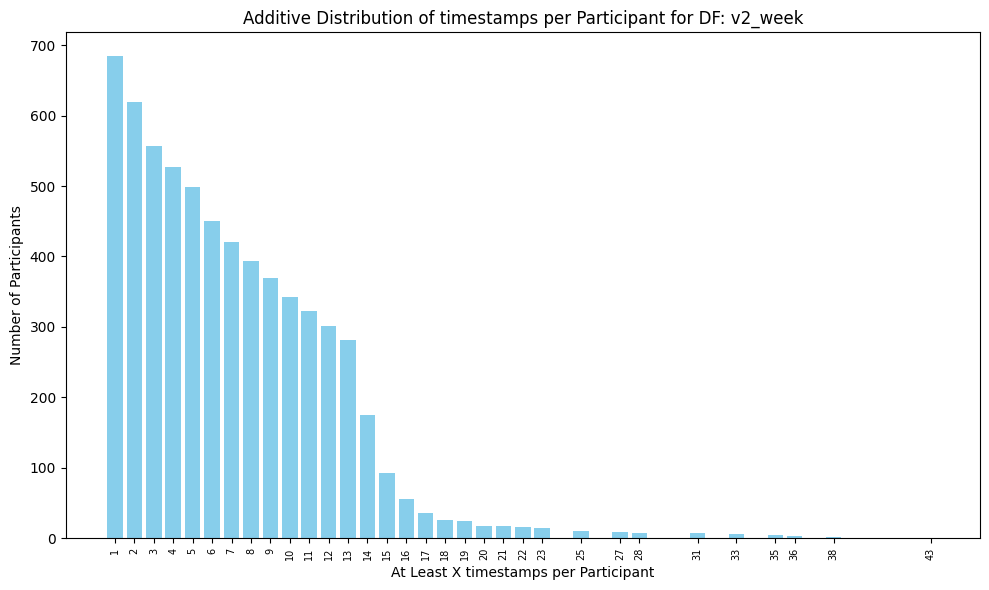

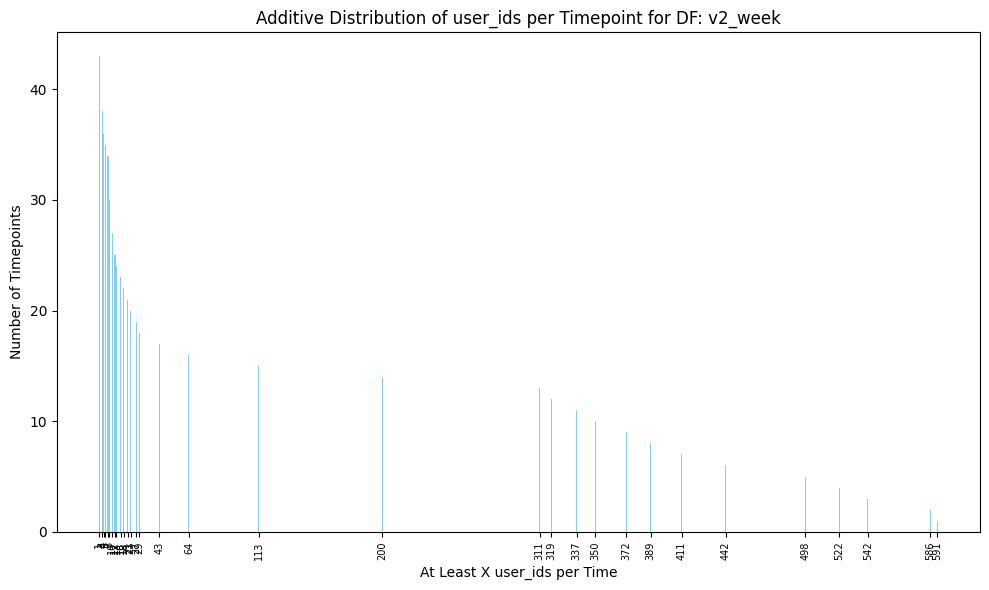

In [28]:
for name in df_names:
    df_c = dfs_mtmkl[name].dropna()
    print(df_c.shape)
    vis.plot_participants_per_time(df_c, time_period='timestamp', id_var='user_id', title=name)
    vis.plot_time_per_participants(df_c, time_period='timestamp', id_var='user_id', title=name)




In [9]:



for name in df_names:
    cols = [col for col in dfs_mtmkl[name].columns if col in daily_cols_v1 or col in daily_v2_common]
    if 'v1' in name:
        df_c = dfs_mtmkl[name].dropna(subset=cols, how='any')
    else:
        df_c = dfs_mtmkl[name].dropna(subset=cols, how='any')
    
    for id, sub_df in df_c.groupby("num_id"):
        if sub_df.shape[0]>20:
            print(f'{sub_df.shape[0]} rows for user {id} from {name}, from {sub_df['day'].unique().min()} to {sub_df['day'].unique().max()}')



30 rows for user 2 from v1_day, from 0 to 30
86 rows for user 3 from v1_day, from 0 to 92
75 rows for user 4 from v1_day, from 0 to 88
47 rows for user 6 from v1_day, from 0 to 52
79 rows for user 22 from v1_day, from 0 to 91
60 rows for user 25 from v1_day, from 33 to 106
49 rows for user 37 from v1_day, from 6 to 94
57 rows for user 52 from v1_day, from 2 to 84
53 rows for user 68 from v1_day, from 0 to 54
78 rows for user 81 from v1_day, from 3 to 93
90 rows for user 85 from v1_day, from 0 to 92
28 rows for user 90 from v1_day, from 2 to 35
97 rows for user 102 from v1_day, from 0 to 96
42 rows for user 103 from v1_day, from 2 to 51
35 rows for user 113 from v1_day, from 4 to 89
90 rows for user 116 from v1_day, from 0 to 91
34 rows for user 118 from v1_day, from 0 to 41
31 rows for user 135 from v1_day, from 6 to 52
38 rows for user 143 from v1_day, from 2 to 85
37 rows for user 148 from v1_day, from 5 to 79
73 rows for user 163 from v1_day, from 0 to 75
68 rows for user 167 from v

In [ ]:

dfs_mtmkl_raw = {}
for name in df_names:
    df_scaled = dfs_mtmkl[name]
    # dfs_imp[name] = dfs_imp[name].rename(columns={'phq2_sum': 'phq2_sum_raw', 'phq9_sum': 'phq9_sum_raw'})
    if 'day' in name:
        # Merge based on participant_id and day
        df_merged = df_scaled.merge(dfs_imp[name][['participant_id', 'day', 'phq2_sum_raw']], 
                            on=['participant_id', 'day'], how='left')
    elif 'week' in name:
        df_merged = df_scaled.merge(dfs_imp[name][['participant_id', 'day', 'phq9_sum_raw']], 
                        on=['participant_id', 'day'], how='left')
    
    df_merged.to_csv(os.path.join(brighten_dir, name, f'{name}_raw45.csv'))
    dfs_mtmkl_raw[name] = df_merged
    



In [ ]:
# data 
# user 1521 from v1_day (90 days of data)
# 83 rows for user 1839 from v1_day, from 0 to 88
# 100 rows for user 1858 from v1_day, from 0 to 99
# 91 rows for user 1904 from v1_day, from 0 to 97



# 50 days of data
# predict phq9 2 wks later

subs = [1521, 1839, 1858, 1904]
df = dfs_mtmkl['v1_day']
df['phq2_sum_bin'] = (df['phq2_sum_raw'] > 0.3).astype(int)
x_cols = [col for col in dfs_mtmkl['v1_day'].columns if col in daily_cols_v1 or col in daily_v2_common]
print(x_cols)
y_col = 'phq2_sum_bin'  # Binary target variable for classification
cols = x_cols + [y_col]
df = df.dropna(subset=cols, how='any')


['aggregate_communication', 'call_count', 'call_duration', 'interaction_diversity', 'missed_interactions', 'mobility', 'mobility_radius', 'sms_count', 'sms_length', 'unreturned_calls']


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class SingleTaskModel(nn.Module):
    def __init__(self, input_dim):
        super(SingleTaskModel, self).__init__()
        self.fc = nn.Linear(input_dim, 1)  # 1 output unit for 1 task
    
    def forward(self, x):
        return torch.sigmoid(self.fc(x))  # Use sigmoid for binary classification




for sub in subs:
    # Filter the dataframe for user_ids and days between 0 and 50
    filter_df = df[(df['num_id']==sub) & (df['day'] >= 0) & (df['day'] <= 50)]
    X = filter_df[x_cols]
    y = filter_df[y_col]
    print(f"Training data for user {sub}: {X.shape}, {y.shape}")
    
    # Validation between 60 and 80 days
    X_val = df[(df['num_id']==sub) & (df['day'] > 60) & (df['day'] <= 80)][x_cols]
    y_val = df[(df['num_id']==sub) & (df['day'] > 60) & (df['day'] <= 80)][y_col]
    print(f"Validation data for user {sub}: {X_val.shape}, {y_val.shape}")

    # Convert DataFrame to a PyTorch tensor
    X_tensor = torch.tensor(X.values, dtype=torch.float32)  # Ensure the dtype is float32
    y_tensor = torch.tensor(y.values, dtype=torch.float32)
    y_tensor = y_tensor.view(-1, 1)  # Reshape y_tensor to (50, 1)

    X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)  # Validation input
    y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)  # Validation target 
    y_val_tensor = y_val_tensor.view(-1, 1)  # Reshape y_tensor to (50, 1)

    # Instantiate the model
    model = SingleTaskModel(input_dim=X_tensor.shape[1])  # Adjust input_dim based on the number of features in X
    criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Example of training loop
    for epoch in range(10):
        optimizer.zero_grad()
        outputs = model(X_tensor)  # X is input data
        loss = criterion(outputs, y_tensor)  # Loss for a single task

        loss.backward()  # Backpropagation
        optimizer.step()

        print(f"Epoch {epoch+1}, Loss: {loss.item()}")

    # Set the model to evaluation mode
    model.eval()

    # Disable gradient calculation during inference (saves memory and computation)
    with torch.no_grad():
        # Make predictions on the validation set
        outputs = model(X_val_tensor)  # X_val is the validation input data
        
        # Since we are using BCELoss, we can apply a threshold (e.g., 0.5) for binary classification
        predictions = (outputs > 0.5).float()  # Threshold at 0.5 for binary classification
        
        # Calculate the loss on the validation set
        val_loss = criterion(outputs, y_val_tensor)  # y_val is the validation target
        
        # Optionally, calculate accuracy
        correct_predictions = (predictions == y_val_tensor).float()  # Compare predicted vs true labels
        accuracy = correct_predictions.mean()  # Mean accuracy

    # Print the validation loss and accuracy
    print(f"Validation Loss: {val_loss.item()}")
    print(f"Validation Accuracy: {accuracy.item()}")


Training data for user 1521: (50, 10), (50,)
Validation data for user 1521: (20, 10), (20,)
Epoch 1, Loss: 1.409696340560913
Epoch 2, Loss: 1.4043649435043335
Epoch 3, Loss: 1.3990434408187866
Epoch 4, Loss: 1.3937325477600098
Epoch 5, Loss: 1.3884321451187134
Epoch 6, Loss: 1.3831427097320557
Epoch 7, Loss: 1.3778643608093262
Epoch 8, Loss: 1.372597336769104
Epoch 9, Loss: 1.3673417568206787
Epoch 10, Loss: 1.3620980978012085
Validation Loss: 1.362993597984314
Validation Accuracy: 0.0
Training data for user 1839: (46, 10), (46,)
Validation data for user 1839: (19, 10), (19,)
Epoch 1, Loss: 0.9364227652549744
Epoch 2, Loss: 0.9337347149848938
Epoch 3, Loss: 0.9310531616210938
Epoch 4, Loss: 0.9283782243728638
Epoch 5, Loss: 0.9257099032402039
Epoch 6, Loss: 0.9230484366416931
Epoch 7, Loss: 0.9203938245773315
Epoch 8, Loss: 0.917746365070343
Epoch 9, Loss: 0.9151058793067932
Epoch 10, Loss: 0.9124728441238403
Validation Loss: 0.5283989906311035
Validation Accuracy: 0.6842105388641357
T